In [1]:
!pip install apriori

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib



#for preprocessing
from mlxtend.preprocessing import TransactionEncoder

In [2]:
store_data = pd.read_excel("/content/drive/MyDrive/KDD/Dataset.xlsx", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7501, 20)


In [3]:
df1 = store_data.copy()

In [4]:
df1.shape

(7501, 20)

## Data Preprocessing

In [5]:
#converting into required format of TransactionEncoder()
trans=[]
for i in range(0,7501):
    trans.append([str(df1.values[i,j]) for j in range(0,20)])

trans=np.array(trans)

print(trans.shape)

(7501, 20)


In [6]:
### Using TransactionEncoder

t=TransactionEncoder()
df1=t.fit_transform(trans)
df1=pd.DataFrame(df1,columns=t.columns_,dtype=int)

df1.shape

(7501, 120)

In [7]:
df1

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
##here we also find nan as one of the columns so lets drop that column

df1.drop('nan',axis=1,inplace=True)

In [10]:
#lets verify whether nan is present in columns
'nan' in df1.columns
#so its proved that nan is not in columns

False

In [12]:
"""Create an empty list to gather the values, and convert in np.array"""
items = []

"""Loop through each value in rows and columns to get each value in the list, no matter even if they are repeated."""
for i in range(0, store_data.shape[0]):
    for j in range(0, store_data.shape[1]):
        items.append(store_data.values[i,j])

items = np.array(items)

In [13]:
print("Total Number of items present in the dataset",len(items))
df = pd.DataFrame(items, columns = ['items'])
df['items'].value_counts().head(10)

Total Number of items present in the dataset 150020


nan                  120657
mineral water          1788
eggs                   1348
spaghetti              1306
french fries           1282
chocolate              1230
green tea               991
milk                    972
ground beef             737
frozen vegetables       715
Name: items, dtype: int64

In [14]:
df['item_count'] = 1

In [15]:
nan_drop = df[df['items'].isnull()].index
df.drop(nan_drop , inplace = True)

In [16]:
## create items list by ascending order to view which one is occuring most
df_items_list = df.groupby(['items']).sum().reset_index().sort_values(by = 'item_count' , ascending = False)
df_items_list.head(10).style.background_gradient(cmap='BuPu')

,items,item_count
76,nan,120657
71,mineral water,1788
36,eggs,1348
100,spaghetti,1306
42,french fries,1282
24,chocolate,1230
53,green tea,991
70,milk,972
54,ground beef,737
48,frozen vegetables,715


From above table we can say that Mineral Water is mostly used or purchased item in the store.

## Data Visualization

[Text(0, 0, 'mineral water'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'spaghetti'),
 Text(0, 0, 'french fries'),
 Text(0, 0, 'chocolate'),
 Text(0, 0, 'green tea'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'ground beef'),
 Text(0, 0, 'frozen vegetables'),
 Text(0, 0, 'pancakes')]

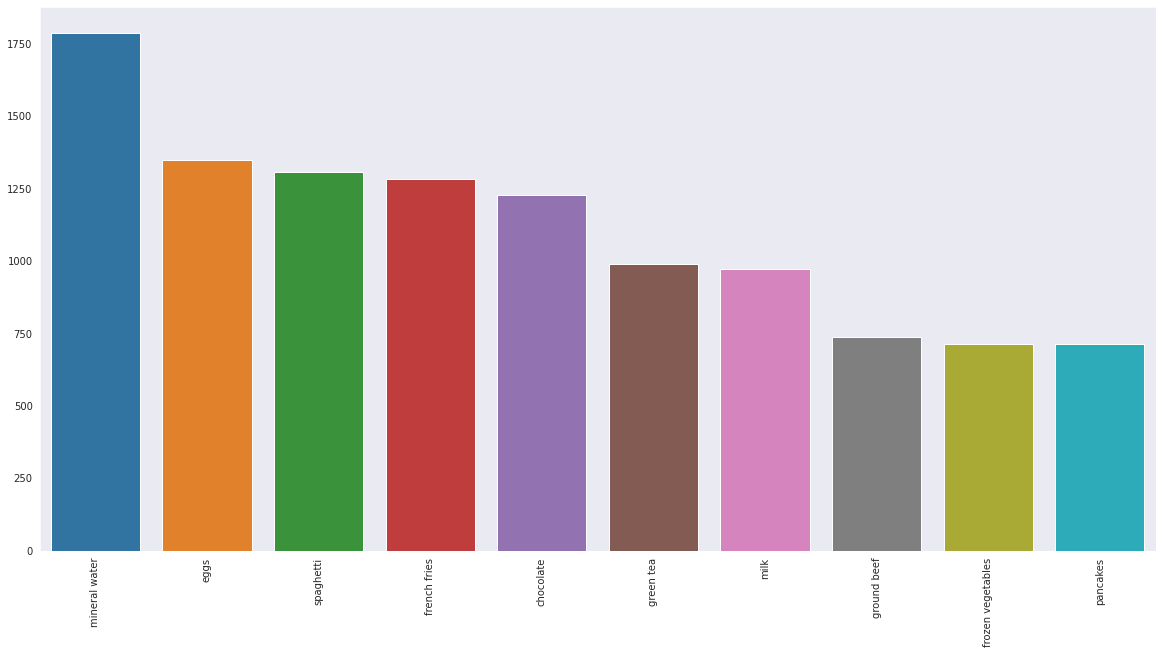

In [26]:
##Lets consider the top 10 items purchased freequently
r=df1.sum(axis=0).sort_values(ascending=False)[:10]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

We can find that mineral water is the most purchased item from the store, we may advice that mineral water must be always in the stock not only that mostly we can see from the above graph what 10 items are being frequently purchased.



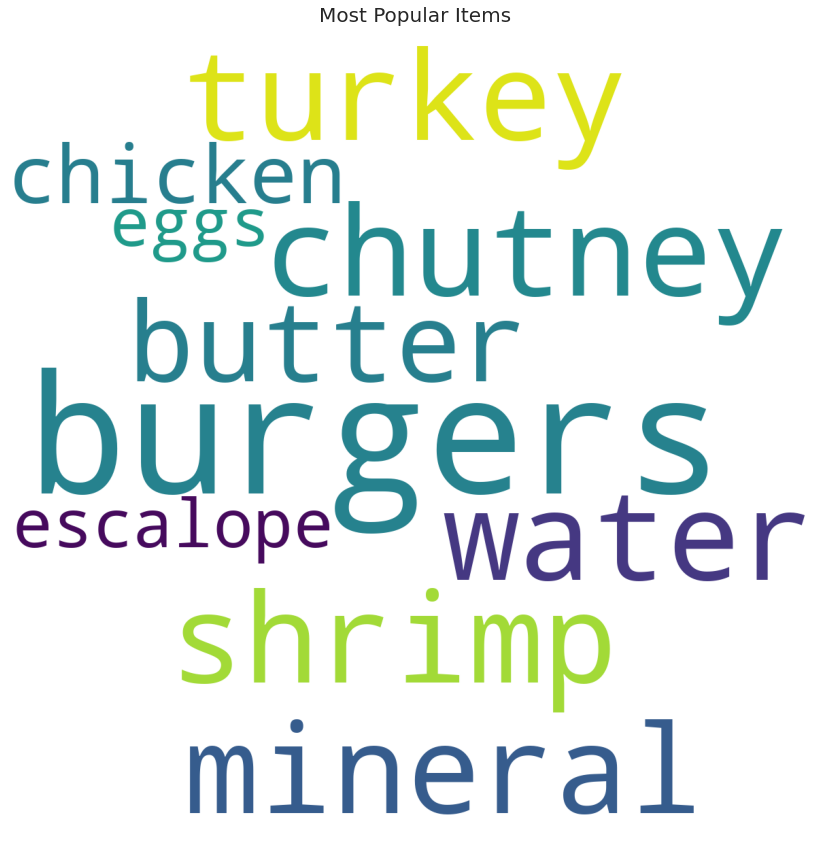

In [27]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 10).generate(str(store_data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

By using WordCloud library we come to know that there are few words such as mineral,escalope,burger,turkey etc are frequently used or been purchased frequently.

In [28]:
df = store_data.copy()

In [29]:
df['food'] = 'Food'
food = df.truncate(before = -1, after = 9)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

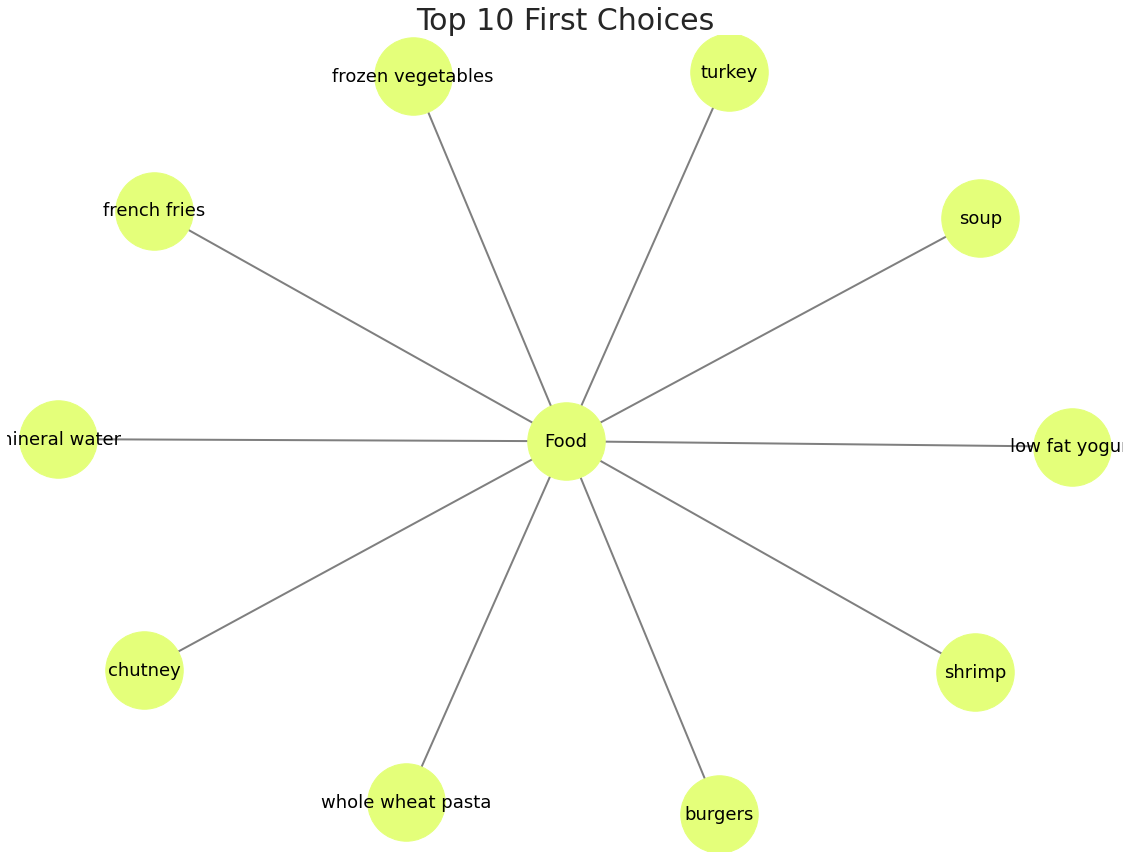

In [30]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 15)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 6000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 2, alpha = 0.5, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices', fontsize = 30)
plt.show()

So from above chart we found out the top 10 food items from the dataset , which should allways be present in the store , because these top 10 itmes are purchased frequently.

In [31]:
df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 12)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

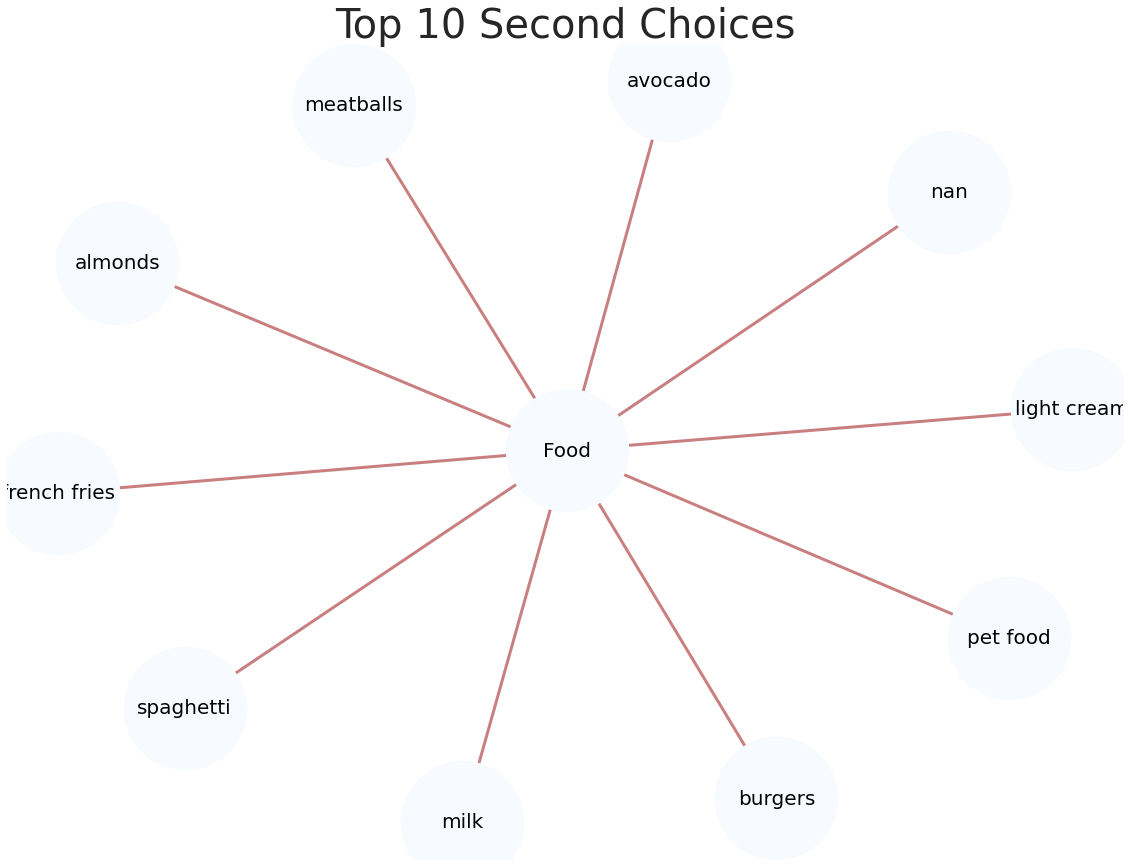

In [32]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 15)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Second Choices', fontsize = 40)
plt.show()

So from above chart we found out the second top 10 food items from the dataset , which should allways be present in the store , because these second top 10 itmes are purchased frequently.

In [33]:
df['thirdchoice'] = 'Third Choice'
secondchoice = df.truncate(before = -1, after = 9)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

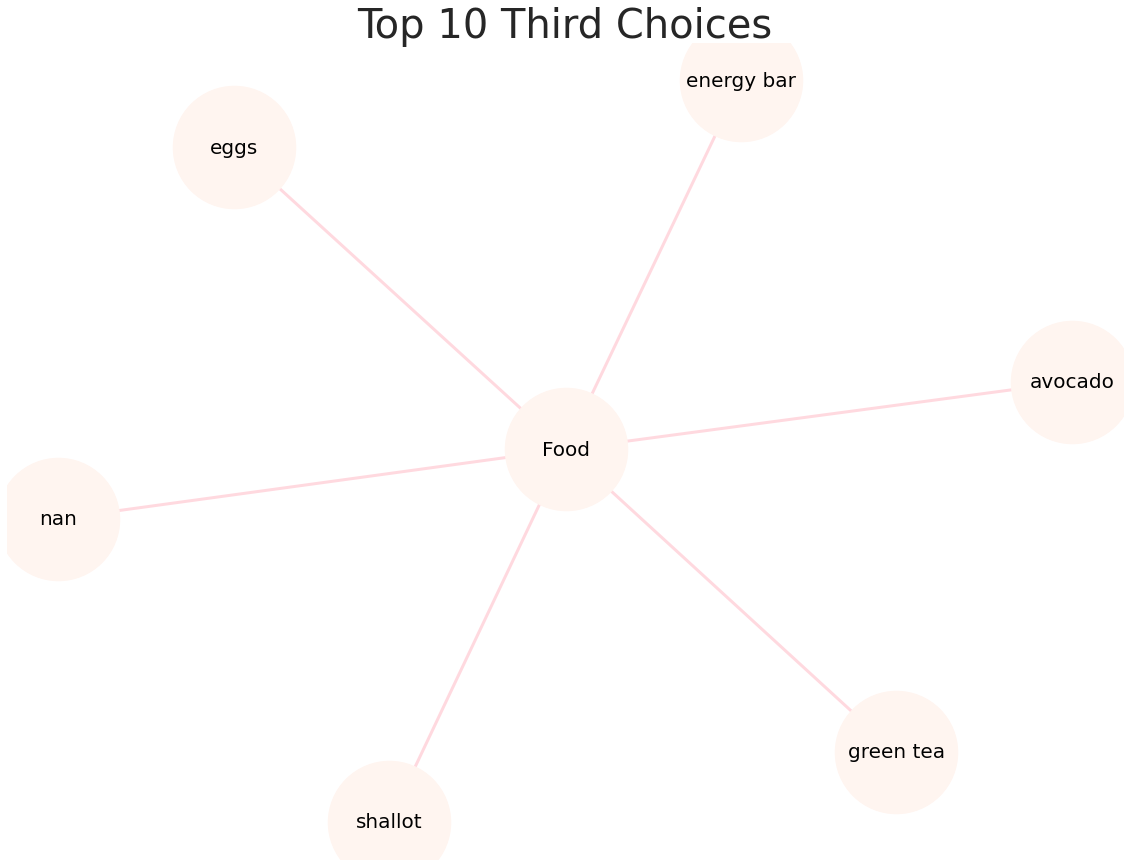

In [34]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 15)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

So from above chart we found out the third top 10 food items from the dataset , which should allways be present in the store , because these third top 10 itmes are purchased frequently.

Relevant Features on the basis of above visualisation

In [8]:
'''
'mineral water', 'burgers', 'turkey', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'eggs',  'french fries', 'almonds','pet food',
                     'milk',   'green tea', 'light cream','chutney',
                    'whole wheat pasta',  'energy bar',  
                    'avocado', 'soup',   'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix',  'meatballs','shallot'
'''

"\n'mineral water', 'burgers', 'turkey', 'frozen vegetables', 'spaghetti',\n                    'shrimp', 'eggs',  'french fries', 'almonds','pet food',\n                     'milk',   'green tea', 'light cream','chutney',\n                    'whole wheat pasta',  'energy bar',  \n                    'avocado', 'soup',   'whole wheat rice', 'low fat yogurt', \n                    'chicken', 'vegetables mix',  'meatballs','shallot'\n"

Above are the relevant features means , are the most frequently used items or the most frequently purchased items in the store .  These items should always  present in the stock always.

In [9]:
records = []
for i in range(1, 7501):
    records.append([str(store_data.values[i, j]) for j in range(0, 20)])

In [10]:
print(type(records))

<class 'list'>


Now applying Apriori Algorithm over the given dataset after preprocessing

In [11]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

Here we have generated association rules from apriori

In [12]:
print("There are {} Relation derived.".format(len(association_results)))

There are 48 Relation derived.


In [13]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'chicken', 'light cream'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'ground beef', 'tomato sauce'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'pasta', 'shrimp'})
frozenset({'chicken', 'light cream', 'nan'})
frozenset({'frozen vegetables', 'chocolate', 'shrimp'})
frozenset({'ground beef', 'cooking oil', 'spaghetti'})
frozenset({'mushroom cream sauce', 'escalope', 'nan'})
frozenset({'pasta', 'escalope', 'nan'})
frozenset({'ground beef', 'frozen vegetables', 'spaghetti'})
frozenset({'olive oil', 'frozen vegetables', 'milk'})
frozenset({'frozen vegetables', 'mineral water', 'shrimp'})
frozenset({'spaghetti', 'olive oil', 'frozen vegetables'})
frozenset({'spaghetti', 'frozen vegetables', 'shrimp'})
frozenset({'spaghetti', 'frozen vegetables', 'tomatoes'})
frozenset({'ground beef', 'spaghetti', 'grated cheese'})
frozenset({'herb & pepper', 'ground beef', 'mineral water'})


In [14]:

for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: frozen vegetables -> chocolate
Support: 0.005333333333333333
Confidence: 0.232558139534883

By using above generated rules we got the value of Support, Confidence and Lift for genrated rules.

Supprot : This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

Confidence : This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

Lift : This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.


From above generated output we can filter out some insights such as:

1) There are 28% of transactions containing mineral water also contain frozen vegetables .

2) There are 29% of transactions containing chicken also light cream.

3) There are 30% of transactions containing mushroom cream sauce also contains escalope.


---

